# This Notebook contains solutions for both Question1 and Question2

In [1]:
### Load Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Global Variables
PATH = 'dataset/'
fico = 'FICO'
region = 'region'
acct_id = 'acct_id'
FICO_RANGE = (300,850)

## Question1

In [3]:
# Loading datasets
cm_region_data = pd.read_csv(PATH+'FDS_written_test_data1_region.csv')
cm_fico_score_data = pd.read_csv(PATH+'FDS_written_test_data1_fico.csv')

In [4]:
## size of the dataset
print(cm_fico_score_data.shape)
print(cm_region_data.shape)

(100013, 2)
(100173, 2)


In [5]:
### sample data
cm_fico_score_data.head()

,acct_id,FICO
0,1,768
1,2,850
2,3,677
3,4,843
4,5,796


In [6]:
cm_region_data.head()

,acct_id,region
0,1,New York
1,2,Dallas
2,3,Los Angeles
3,4,Chicago
4,5,Philadelphia


### Task1

In [7]:
cm_fico_score_data.info() ## Column FICO data type is corrupted. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100013 entries, 0 to 100012
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   acct_id  100013 non-null  int64 
 1   FICO     70398 non-null   object
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


In [8]:
## let's understand why the FICO column is object type.
for i in cm_fico_score_data[fico].unique():
    try:
        if not i.isdigit():
            print(i)
    except:
        pass
### FICO values are text such as AA and SSS.

AA
SSS


In [9]:
## Null Count
cm_region_data.isnull().sum() ### All Card Members (CMs) region is available - No Missing Values

acct_id    0
region     0
dtype: int64

In [10]:
cm_fico_score_data.isnull().sum() ### 29615 CMs do not have FICO score

acct_id        0
FICO       29615
dtype: int64

#### Observations: 
1. FICO score has corrupted values. The rational is as below -
    1. FICO values ranges between 300-850. But the dataset shows minimum value of 1 and Maximum values of 100K.
    2. Thus, any FICO score below 300 and above 850 are error data and should be excluded from analysis.   
2. FICO values are texts such as AA and SSS. These are incorrect values and should be removed from data.
3. 29615 card-members FICO score is missing (NULL value).

In [11]:
cm_region_data.duplicated().sum() ## 49 duplicate records found 
cm_fico_score_data.duplicated().sum() ## 13 duplicate records found

13

In [12]:
# These accounts have duplicate entries in region dataset.
cm_region_data[cm_region_data.duplicated()]['acct_id'].unique()

array([   27,  2575,  5011,  5737,  6291,  7673,  8661, 10318, 11283,
       13304, 14512, 15289, 15973, 16011, 18653, 19328, 19432, 20017,
       20065, 21261, 21469, 21990, 22021, 22511, 24599, 24955, 26234,
       26591, 27769, 28081, 34438, 34774, 35233, 35638, 35680, 35688,
       35969, 36435, 36763, 37134, 37460, 37673, 38701, 40656, 41350,
       41590, 42537, 43434, 43880], dtype=int64)

In [13]:
## Sample example
cm_region_data[cm_region_data[acct_id]==27] ## row 27 is duplicate entry of row 26

,acct_id,region
26,27,Los Angeles
27,27,Los Angeles
28,27,Dallas


In [14]:
# These accounts have duplicate entries.
cm_fico_score_data[cm_fico_score_data.duplicated()]['acct_id'].unique()

array([  140,   189,   190,   191,   192, 30501, 30502, 30503, 30504,
       30505, 30506, 30507, 30508], dtype=int64)

In [15]:
## Sample example
cm_fico_score_data[cm_fico_score_data[acct_id]==140] ## row 139 is duplicate entry of row 140

,acct_id,FICO
139,140,752
140,140,752


In [16]:
## dropping duplicates
cm_fico_score_data.drop_duplicates(inplace=True)
cm_region_data.drop_duplicates(inplace=True)

In [17]:
### Cleaning data: Marking rows with data problems as “Missing” in the FICO column
cm_fico_score_data[fico] = cm_fico_score_data[fico].fillna('Missing')
cm_fico_score_data[fico] = np.where(cm_fico_score_data[fico].isin(['AA','SSS']), 'Missing', cm_fico_score_data[fico])

In [18]:
## Splitting dataset to identify all Missing values
cm_fico_score_data_p1 = cm_fico_score_data[~(cm_fico_score_data[fico]=='Missing')]
cm_fico_score_data_p2 = cm_fico_score_data[(cm_fico_score_data[fico]=='Missing')]

cm_fico_score_data_p1['FICO'] = cm_fico_score_data_p1['FICO'].astype(int)
# cm_fico_score_data_p1[fico] = cm_fico_score_data_p1[fico].apply(lambda x: 'Missing' if ((x < FICO_RANGE[0]) | (x > FICO_RANGE[1])) else x )

cm_fico_score_data_cp = pd.concat([cm_fico_score_data_p1, cm_fico_score_data_p2], axis=0) ## this has all issue rows marked with "Missing" values

# print(cm_fico_score_data.shape)
# print(cm_fico_score_data_cp.shape)

print('{} rows have "Missing" values.'.format(cm_fico_score_data_cp[cm_fico_score_data_cp[fico]=='Missing'].shape[0]))
print('{} rows have valid FICO values.'.format(cm_fico_score_data_cp[cm_fico_score_data_cp[fico]!='Missing'].shape[0]))


### Splitting again to filter out correct FICO range values
cm_fico_score_cdata = cm_fico_score_data_cp[~(cm_fico_score_data_cp[fico]=='Missing')] ## correct values
cm_fico_score_idata = cm_fico_score_data_cp[(cm_fico_score_data_cp[fico]=='Missing')] ## issue values
cm_fico_score_cdata['FICO'] = cm_fico_score_cdata['FICO'].astype(int)

# print(cm_fico_score_cdata.shape)
# print(cm_fico_score_idata.shape)
# print(cm_fico_score_cdata.shape[0]+cm_fico_score_idata.shape[0])

29614 rows have "Missing" values.
70386 rows have valid FICO values.


### Task2
The account IDs are grouped into five segments based on FICO 'ratings'. The ratings are computed as per article: 
https://www.myfico.com/credit-education/what-is-a-fico-score


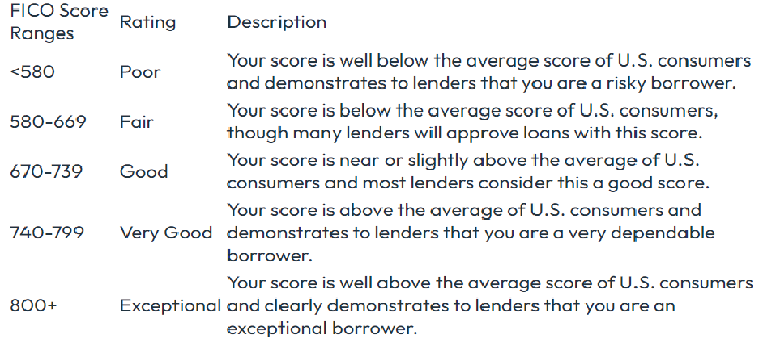

In [19]:
cm_fico_score_cdata.describe()
## the dataset has minimum FICO 420 and maximum FICO 850. 

,acct_id,FICO
count,70386.000000,70386.000000
mean,50280.373966,785.747066
std,27740.592764,64.603625
min,1.000000,420.000000
25%,26143.250000,749.000000
50%,49720.500000,804.000000
75%,73245.750000,839.000000
max,99992.000000,850.000000


In [20]:
# cm_fico_score_cdata.describe()
cm_fico_score_cdata['rating'] = cm_fico_score_cdata[fico].apply(lambda x: 'Exceptional' if x >= 800 else
                                                               'very Good' if ((x >= 740) & (x < 800)) else
                                                               'Good' if ((x >= 670) & (x < 740)) else
                                                               'Fair' if ((x >= 580) & (x < 670)) else 'Poor')

In [21]:
### Number of customers by each 'rating' group
cm_fico_score_cdata.groupby('rating')['acct_id'].count() 

rating
Exceptional    36928
Fair            3398
Good           10979
Poor             753
very Good      18328
Name: acct_id, dtype: int64

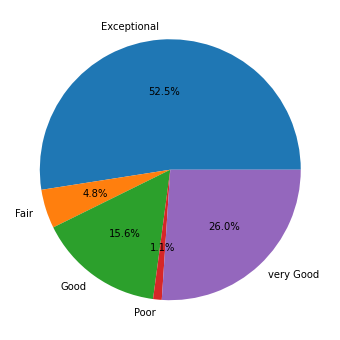

In [22]:
### Percentage of each segments
x = cm_fico_score_cdata.groupby('rating')['acct_id'].count()
labels = x.index
sizes = x.values

fig, ax = plt.subplots(figsize=(6,6))
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

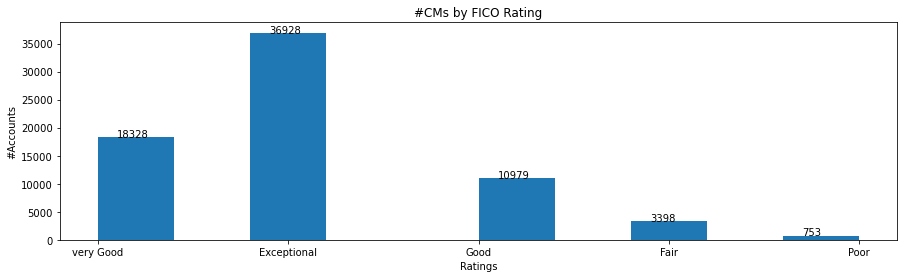

In [23]:
### Histogram distribution
fig, ax = plt.subplots(1,1, figsize=(15,4))
counts, edges, bars  = ax.hist(cm_fico_score_cdata['rating'])
for n, b in zip(counts, edges):
    if n > 0:
        plt.gca().text(b + 0.1, int(n), int(n))
ax.set_title('#CMs by FICO Rating')
ax.set_xlabel('Ratings')
ax.set_ylabel('#Accounts')
plt.show()

### Task3
1. The above plot shows above 52% of the account have 'Exceptional' FICO rating. This looks odd for two reasons: 1) This percentage is much higher than market range (market average ~20%) and 2) Practically, maintaining an exceptional rating is difficult tasks however, maintaining "Good" and "Very Good" is relatively much easy. This indicates data having potential issues.
2. Ratings 'Fair' and 'Poor' account percentages are also very low (market average is 16-17%). 
3. Good and Very Good combined percentage is slightly lower than market ratings but can be ignored.
3. It looks like many accounts have falsly received exceptional score although, they belong to bottom 2 rating ccategories.

Overall summary, in general the data do not reflect real world FICO rating's. However, I must also say that the above distribution is possible for Amex cardholders. It is likely Amex cardholders (who are premium groups) may be maintaining 800+ FICO score. The final conclusion can be made only based on analysis which involves knowing more information.

### Task4

In [24]:
temp_table = cm_fico_score_cdata.merge(cm_region_data, on='acct_id', how='left')
temp_table.head()

,acct_id,FICO,rating,region
0,1,768,very Good,New York
1,2,850,Exceptional,Dallas
2,3,677,Good,Los Angeles
3,4,843,Exceptional,Chicago
4,5,796,very Good,Philadelphia


In [25]:
temp_table.groupby('region')['acct_id'].count() ##

region
Charlotte       7091
Chicago         6928
Dallas          7273
Houston         7065
Los Angeles     6982
New York        7071
Philadelphia    6951
Phoenix         7014
San Antonio     7189
San Diego       6946
Name: acct_id, dtype: int64

In [26]:
fico_by_region = temp_table.groupby('region')[fico].mean().reset_index().rename(columns={'FICO':'avg_fico'}).sort_values('avg_fico', ascending=False)
fico_by_region.head() ## Descending Order of Average FICO

,region,avg_fico
7,Phoenix,788.170231
4,Los Angeles,787.223002
3,Houston,786.005803
6,Philadelphia,785.773845
1,Chicago,785.643043


In [27]:
fico_by_region.tail()

,region,avg_fico
0,Charlotte,785.154280
5,New York,785.065903
8,San Antonio,784.508277
9,San Diego,784.076447
2,Dallas,782.102021


In [28]:
fico_by_region['rank'] = fico_by_region['avg_fico'].rank(method='min')
# fico_by_region.head()
# rank_of_interest 
second_highest = fico_by_region['rank'].unique()[1]
lowest = fico_by_region['rank'].unique()[-1]

In [29]:
# Regions with the second highest and lowest average FICO score
fico_by_region[fico_by_region['rank'].isin([second_highest,lowest])][['region', 'avg_fico']]

,region,avg_fico
4,Los Angeles,787.223002
2,Dallas,782.102021


## Question2

In [30]:
train_data = pd.read_excel(PATH+'modeling_data.xlsx', sheet_name='Train')
test_data = pd.read_excel(PATH+'modeling_data.xlsx', sheet_name='Test')
print(train_data.shape)
train_data.head() # sample rows

(406, 8)


,target,var1,var2,var3,var4,var5,var6,var7
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


### Exploratory Data Analysis

In [31]:
train_data.info()
## Target variable has 8 (approx. 2%) Missing values. Rows with Target Missing values will be excluded from dataset.

## Feature variables do not have missing values. 
## Feature variables values ranges can not be validated as their true meaning is unknown.
## Hence, no futher data checks are performed on feature variables and the values are used in its current form, assuming all values are correct.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  398 non-null    float64
 1   var1    406 non-null    int64  
 2   var2    406 non-null    float64
 3   var3    400 non-null    float64
 4   var4    406 non-null    int64  
 5   var5    406 non-null    float64
 6   var6    406 non-null    int64  
 7   var7    406 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 25.5 KB


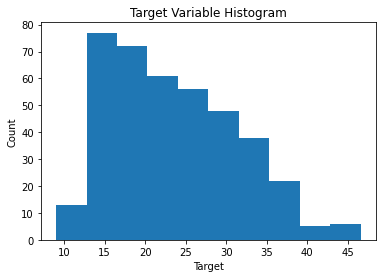

In [32]:
# Target Analysis
plt.hist(train_data.target, bins=10) 
plt.title('Target Variable Histogram')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()
### Histogram shows that the target variable has numerious discrete values. 
# Based on this info, considering the target as continous variable and this problem as regression problem (Not Classification).

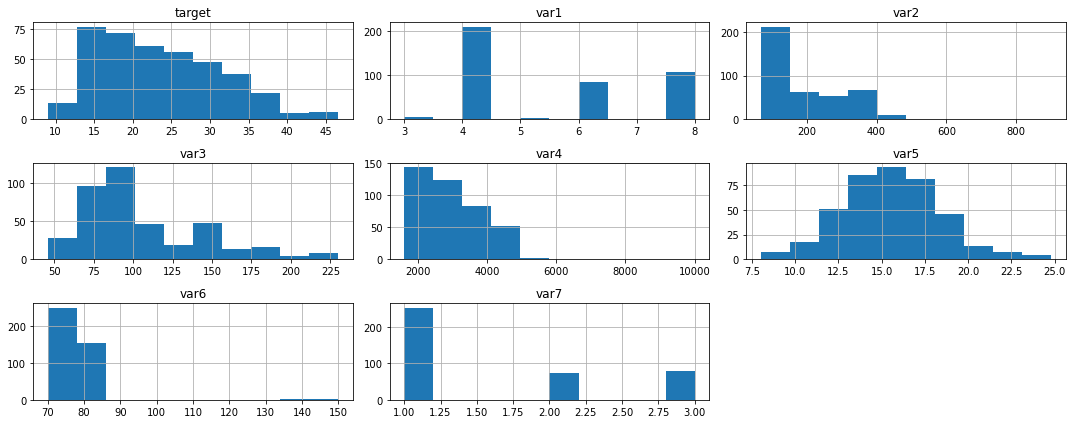

In [33]:
## data distibution
train_data.hist(figsize=(15,6))
plt.tight_layout()
plt.show()

In [34]:
print(train_data.var7.nunique())
print(train_data.var1.nunique())

3
5


###### From Histogram
1. Features: var7 and var1 looks to be discrete numerical types
2. var2, var3, var4 and var6 are continuous numerical types.

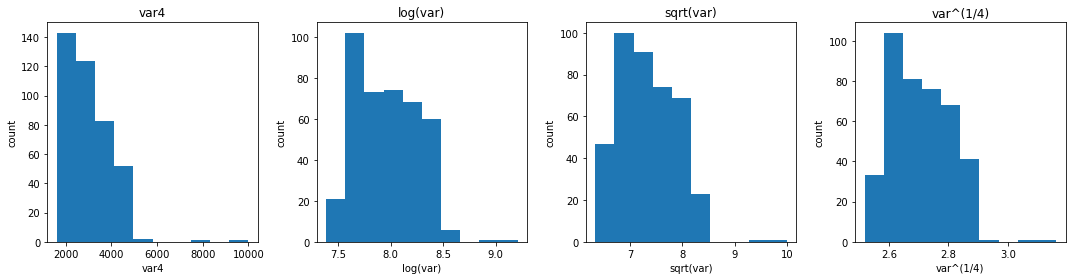

In [35]:
var = 'var4' ## var4 has highest (positive) skewness.
fif, ax = plt.subplots(1,4, figsize=(15,4))
ax[0].hist(train_data[var])
ax[1].hist(np.log1p(train_data[var]))
ax[2].hist(np.power(train_data[var], 0.25))
ax[3].hist(np.power(train_data[var], 0.125))

ax[0].set_title(var)
ax[0].set_xlabel(var)
ax[0].set_ylabel('count')

var = 'log(var)'
ax[1].set_title(var)
ax[1].set_xlabel(var)
ax[1].set_ylabel('count')

var = 'sqrt(var)'
ax[2].set_title(var)
ax[2].set_xlabel(var)
ax[2].set_ylabel('count')

var = 'var^(1/4)'
ax[3].set_title(var)
ax[3].set_xlabel(var)
ax[3].set_ylabel('count')

plt.tight_layout()
plt.show()

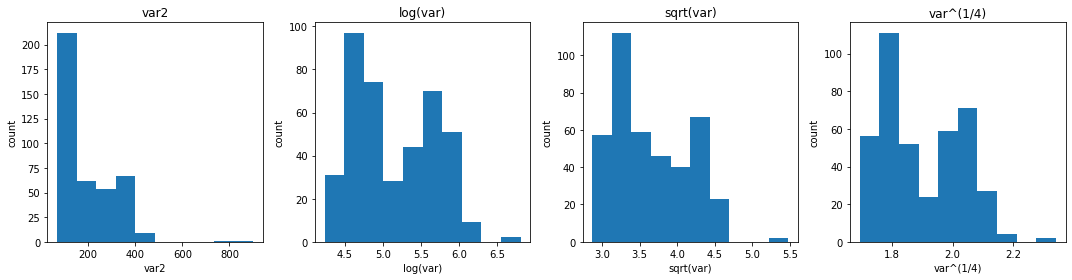

In [36]:
var = 'var2' ## For var2 skewness plus binning looks to be appropriate approach (not convered)
fif, ax = plt.subplots(1,4, figsize=(15,4))
ax[0].hist(train_data[var])
ax[1].hist(np.log1p(train_data[var]))
ax[2].hist(np.power(train_data[var], 0.25))
ax[3].hist(np.power(train_data[var], 0.125))

ax[0].set_title(var)
ax[0].set_xlabel(var)
ax[0].set_ylabel('count')

var = 'log(var)'
ax[1].set_title(var)
ax[1].set_xlabel(var)
ax[1].set_ylabel('count')

var = 'sqrt(var)'
ax[2].set_title(var)
ax[2].set_xlabel(var)
ax[2].set_ylabel('count')

var = 'var^(1/4)'
ax[3].set_title(var)
ax[3].set_xlabel(var)
ax[3].set_ylabel('count')

plt.tight_layout()
plt.show()

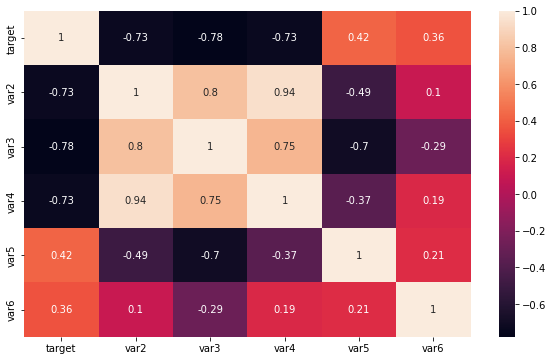

In [37]:
## Correlation of the target variable with var2/3/4/5/6
plt.figure(figsize=(10,6))
sns.heatmap(train_data[['target','var2','var3','var4','var5','var6']].corr(), annot=True)
plt.show()

## Observations from heatmap matrix.
# Target is strongly negatively correlated with var2, var3, and var4
# var2 is strongly positively correlated with var4. Dropping one of them will reduce multicollinearity effect.
# var2 is strongly positively correlated with var3. Dropping one of them will reduce multicollinearity effect.
# Other combinations have medium to weak correlation.

In [38]:
## Exclude missing target variables
train_data.dropna(inplace=True)
# New size
train_data.shape

(392, 8)

In [39]:
train_data.target.nunique()

127

### Model Training, Evaluation and Testing



#### Classification Vs. Regression
The target variable has integer values but there are 127 unique values. It is possible that there can be 127 distinct categories, however, given the dataset size the target variable is assumed to be continous variable, instead distinct categories. Hence, based on dataset target variable, building a regression model is most suitable than building a classification model. Thus, a regression modelling is choosen.

#### Model selection
- As there are just 392 samples (very small dataset) the simplest model can be used for training. Going with complex models (such as Random Forest, SVM, etc.) will not be beneficial rather would increase training time and may be highly over-fitted which in turn would lead to a lot of work in terms of tunning hyper parameters.
- As majority of the features are numerical types, I would choose the regression model over other models such as decision tree.  
- Hence, my choice goes with "Linear Regression" model - this is the most simplest form of rigression model and works well on small datasets. 


#### Approach
- Started with data preprocessing to handle skewness, scale effect, etc., followed by base model training (on all the feature variables). In the next step, planned to improve model performance through several techniques such as hyper-parameter tunings, model stacking, ensembling, feature engineering (not applicable in this case, as features descriptions not available), multicollinearity handling, etc.
- Lastly, the possible best model is used to make prediction on test datasets.

#### Model Performance Evaluation
- R^2 (R Squared) is used as performance metrics for model evaluation. R Squared represents the proportion of the variation in the dependent variable that is predictable from the independent variable. Range [ 0,1] where 0 value indicates that model is poor (fail to capture variation in the dataset) and 1 indicates the model has captured 100% of the variations of the target variable. The model with R^2 > 0.7 is considered to be good model and with R^2 ~ 1 is considered the best model.

#### Miscellaneous
- As the target variable has integer values, the output of the regression model is truncated to integer values.

In [40]:
# from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score

In [41]:
FEATURE_SET1 = ['var1', 'var2', 'var3', 'var4', 'var5', 'var6', 'var7']
FEATURE_SET2 = ['var1', 'var3', 'var4', 'var5', 'var6', 'var7'] # Exclude 'var2' 
FEATURE_SET3 = ['var1', 'var2', 'var4', 'var5', 'var6', 'var7'] # Exclude 'var3'
FEATURE_SET = (FEATURE_SET1, FEATURE_SET2, FEATURE_SET3)

In [42]:
############################### BASE MODEL #########################
trainset = train_data.copy()
FEATURES = FEATURE_SET[0]

## Seperating data into features and target
X = trainset[FEATURES]
y = trainset['target'].values

########## Scaling model
scaler = StandardScaler().fit(X,y)
X = scaler.transform(X)

######## Split dataset into training and validation set.
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)
print(X_train.shape)
print(X_val.shape)

########### Base model [All feature variables are used.]
lr_model = LinearRegression().fit(X_train, y_train) ## base model
## Model Evaluation
y_pred = lr_model.predict(X_val).astype(int)
print('Training Set: R Squared = {}'.format(r2_score(y_train, lr_model.predict(X_train)))) 
print('Validation Set: R Squared = {}'.format(r2_score(y_val, y_pred))) ## R^2 ~ 78% Good performance

(294, 7)
(98, 7)
Training Set: R Squared = 0.8174723069827782
Validation Set: R Squared = 0.7774276570150279


In [43]:
############################### Model Version 1: Handled var4 Skewness #########################
trainset = train_data.copy()
FEATURES = FEATURE_SET[0]

## correcting skewness of var4
trainset['var4'] = np.power(trainset['var4'], 0.25) 

## Seperating data into features and target
X = trainset[FEATURES]
y = trainset['target'].values

########## Scaling model
scaler = StandardScaler().fit(X,y)
X = scaler.transform(X)

######## Split dataset into training and validation set.
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)
# print(X_train.shape)
# print(X_val.shape)

########### Base model [All feature variables are used.]
lr_model_v1 = LinearRegression().fit(X_train, y_train) 
## Model Evaluation
y_pred = lr_model_v1.predict(X_val).astype(int)
print('R Squared = {}'.format(r2_score(y_val, y_pred))) ## R^2 ~ 79% (Improved R2 by 1%)

R Squared = 0.7952848143585124


In [44]:
############################### Model Version 2: Handled var4 Skewness + FEATURE_SET2 #########################
trainset = train_data.copy()
FEATURES = FEATURE_SET[1]

## correcting skewness of var4
trainset['var4'] = np.power(trainset['var4'], 0.25)

## Seperating data into features and target
X = trainset[FEATURES]
y = trainset['target'].values

########## Scaling model
scaler = StandardScaler().fit(X,y)
X = scaler.transform(X)

######## Split dataset into training and validation set.
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)
# print(X_train.shape)
# print(X_val.shape)

########### Version 2 model
lr_model_v2 = LinearRegression().fit(X_train, y_train) 
## Model Evaluation
y_pred = lr_model_v2.predict(X_val).astype(int)
print('R Squared = {}'.format(r2_score(y_val, y_pred))) ## Good performance (best score so far)

R Squared = 0.8005848838896836


In [45]:
############################### Model Version 2: Handled var4 Skewness + FEATURE_SET3 #########################
trainset = train_data.copy()
FEATURES = FEATURE_SET[2]

## correcting skewness of var4
trainset['var4'] = np.power(trainset['var4'], 0.25)

## Seperating data into features and target
X = trainset[FEATURES]
y = trainset['target'].values

########## Scaling model
scaler = StandardScaler().fit(X,y)
X = scaler.transform(X)

######## Split dataset into training and validation set.
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)
# print(X_train.shape)
# print(X_val.shape)

########### Version 3 model
lr_model_v3 = LinearRegression().fit(X_train, y_train) 
## Model Evaluation
y_pred = lr_model_v3.predict(X_val).astype(int)
print('R Squared = {}'.format(r2_score(y_val, y_pred))) ## Good performance

R Squared = 0.7936132539679123


######  Table: Model Performance on Validation Set

| Model Version | R^2 (%) | Description |
| --- | --- | --- |
| Version0 | 77.74 | Base model using all feature variables |
| Version1 | 79.52 | Handled skewness of feature var4 + all features |
| Version2 | 80 | Handled skewness of feature var4 + all features except var2 |
| Version3 | 79.36 | Handled skewness of feature var4 + all features except var3 |

Version2 is best performance.

#### Prediction: Prediction on test dataset using final model object

In [46]:
## Applying same preprocessing steps on test set
X_test = test_data.copy()
X_test['var4'] = np.power(X_test['var4'], 0.25)
X_test = X_test[FEATURE_SET[2]]
X_test = scaler.transform(X_test) ## scaling feature

# Prediction using best model
best_model = lr_model_v2
test_data['target'] = best_model.predict(X_test).astype(int)
test_data.head()

,target,var1,var2,var3,var4,var5,var6,var7
0,17,6,232,100,3288,15.5,71,1
1,13,8,318,150,4237,14.5,73,1


#### Model Performance Improvement Future Scope: The below techniques can be leveraged to further improve R Squared value (currently 0.8). Currently, due to shortage of time can be experimented more.
1. Hyper-parameter tunning - Looks less promising as Rigression model has few parameters.
2. Model Stacking & Ensembling - This can improve model performance by marginal values.
3. Feature Engineering - Creating strong features using exising data (must know feature details to do so)
4. Applying statistical techniques to handle skewness of the numerical features - For example: var2 can be replaced with binned values.
5. Lastly, increasing dataset size by including more samples.